<a href="https://colab.research.google.com/github/Sofigam00s/Aprendizaje-Automatico-IA/blob/main/TP1_AA1_regresion_lineal_GamalloSofia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Gamallo Sofia Antonia**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Para este trabajo voy a utilizar un dataset sobre la estimación de los niveles de obesidad según los hábitos alimentarios y condición física.

El link al dataset es el siguiente: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [ ]:
#Voy a comenzar leyendo el dataset
import pandas as pd #Para poder leerlo

dataset = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Descripción del dataset 📇

El dataset que utilizo se llama *'Estimation of obesity based on eating habits and physical condition'*.

Contiene datos sintéticos de personas, que sirven para modelar el índice de masa corporal (IMC) y estimar la categoría de obesidad de un individuo en base a sus hábitos alimenticios, condiciones físicas y demográficas.

Este tipo de información puede ser útil en contextos de salud pública, nutrición y medicina preventiva, para identificar factores de riesgo relacionados con el sobrepeso y la obesidad.

# Descripción de las variables 🔢


*   **Gender:** género de la persona (maculino/femenino). Es de tipo categórica nominal.

*   **Age:** edad de las personas. Es de tipo numérica continua.

*   **Height:** altura en metros. Es de tipo numérica continua.

*   **Weight:** peso en kilos. Es de tipo numérica continua.

*   **family_history_with_overweight:** indica si hay antecedentes familiares de sobrepeso (yes/no). Es de tipo categórica nominal.

*   **FAVC:** si se consume con frecuencia alimentos con alto contenido calórico (yes/no). Es de tipo categórca nominal.

*   **FCVC:** frecuencia de consumo de verduras (1-3). Es te tipo numérica ordinal.

*   **NCP:** número de comidas principales por día. Es de tipo numérica discreta.

*   **CAEC:** 	consumo de alimentos entre comidas (no/sometimes/frequently/always). Es de tipo categórica ordinal.

*   **SMOKE:** si fuma (yes/no). Es de tipo categórica nominal.

*   **CH20:** consumo de agua en litros. Es tipo numérica continua.

*   **SCC:** si monitorea su consumo calórico (yes/no). Es de tipo categórica nominal.

*   **FAF:** frecuencia de actividad física semanal (horas). Es te tipo numérica continua.

*   **TUE:** 	tiempo diario usando dispositivos electrónicos (horas). Es de tipo numérica continua.

*   **CALC:** 	consumo de alcohol (no/Sometimes/Frequently/Always). Es de tipo categórica ordinal.

*   **MTRANS:** medio de tranporte que utiliza (Bike/Car/Walking/Public/Motorbike). Es de tipo categórica nominal.

*   **NObeyesdad:** categoría de obesidad según el IMC. es de tipo categórica ordinal.


>Esta información se encuentra en el mismo link del dataset.





## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

#Target elegido🟢

Voy a utilizar como target al **IMC** (índice de masa corporal).
Para hacerlo tengo que crearlo, y lo hago utilizando las dos variables de peso y altura, ya que el IMC está dado por el cálculo de estas mismas.

Esto me permte plantear el problema como una regresión continua, más adecuada para la regresión lineal, y más útil en aplicaciones clínicas que requieren un valor exacto del índice de masa corporal.

Además, al utlizar este target, puedo eliminar 3 variables, el peso y la altura ya que sería redundante dejarlas, y ademas la variable *NObeyesdad* que describe en palabras el estado del peso, y estaría aportando la misma información que el IMC solo que en palabras distintas.



In [ ]:
#Calculo el IMC con las variables peso y altura y lo agrego al dataset
dataset["IMC"] = dataset["Weight"] / (dataset["Height"] ** 2)

# Describir variables 📊

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21



> El dataset tiene 2111 registros y 18 columnas. No hay valores nulos en ninguna columna ya que todas contienen los mismos registros, así que no es necesario imputar datos faltantes.
Hay 9 variables numéricas y 9 variables categóricas.



In [ ]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700159
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011337
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998685
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325802
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.719089
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.016501
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.811753




> Las variables se encuentran en rangos razonables, aunque hay algunas como el peso, la edad y el IMC con mayor rango y dispersión (esto puede indicar posibles outliers).



#Visualización de variables 📈


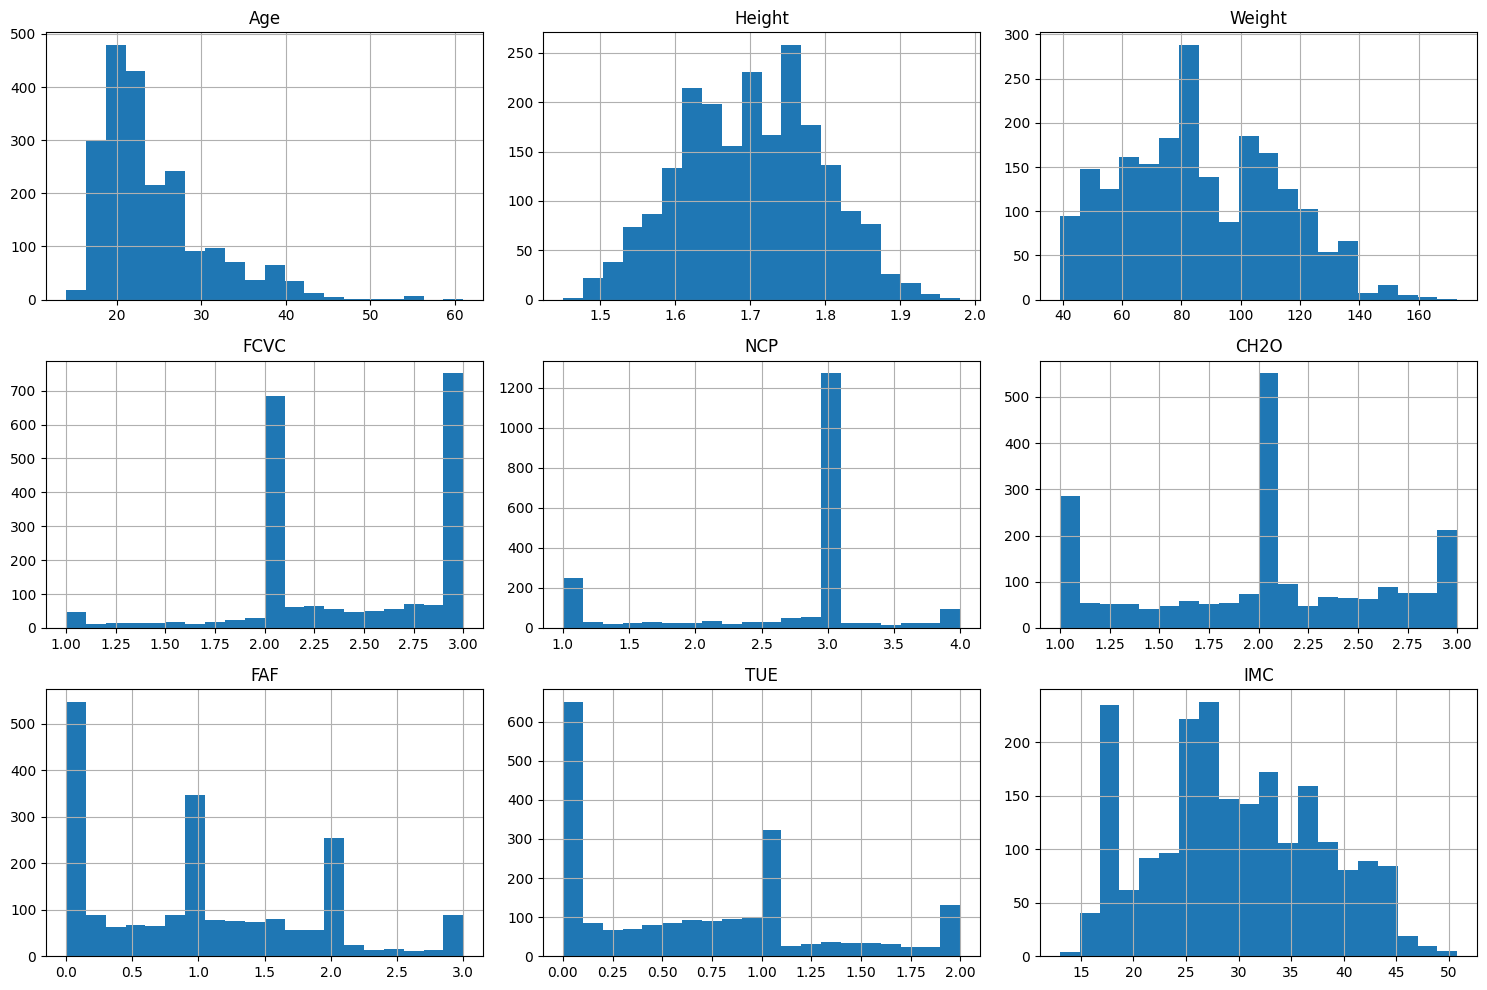

In [ ]:
# Histogramas de variables numéricas
import matplotlib.pyplot as plt
dataset.hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()


**Análisis del historigrama**

* La altura y el peso son las mejores candidatas para el modelo por su forma y escala.

* La edad sirve si se transforma.

* Las demás (FCVC, NCP, CH2O, FAF, TUE) no tienen distribuciones lineales claras. Hay que procesarlas para no confundir el modelo de regresión.



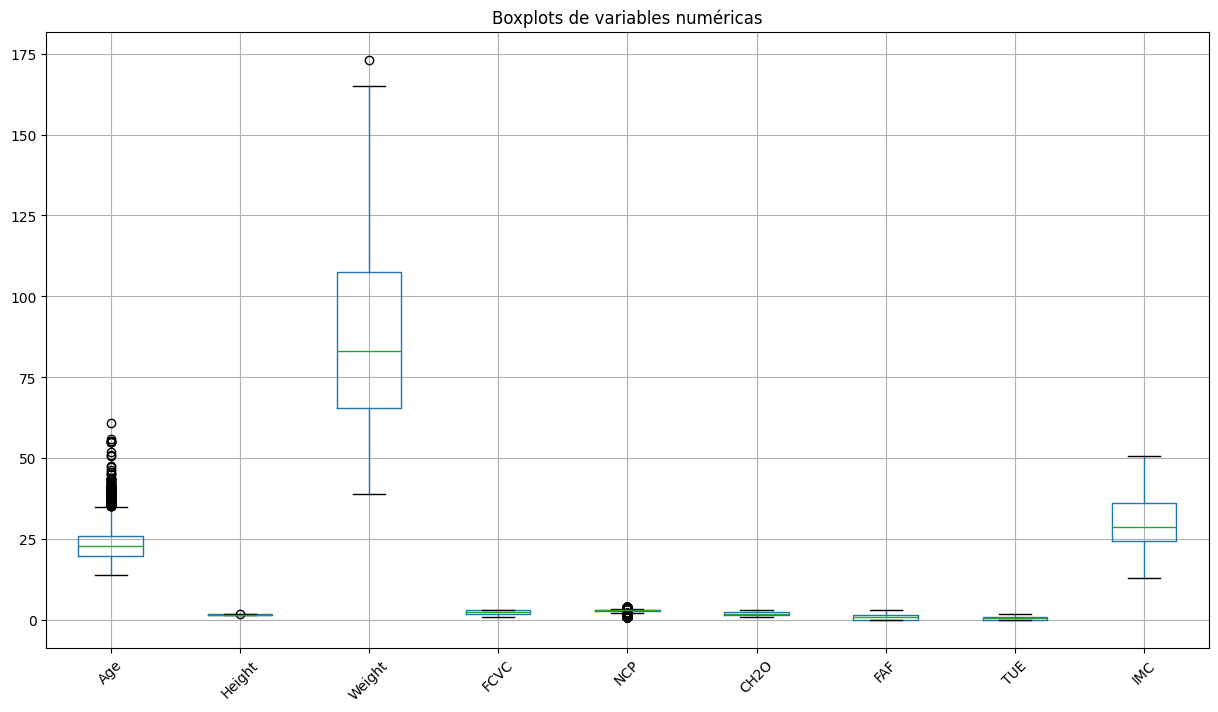

In [ ]:
# Boxplots de las variables numéricas
numeric_cols = dataset.select_dtypes(include='number').columns

plt.figure(figsize=(15,8))
dataset[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots de variables numéricas")
plt.show()


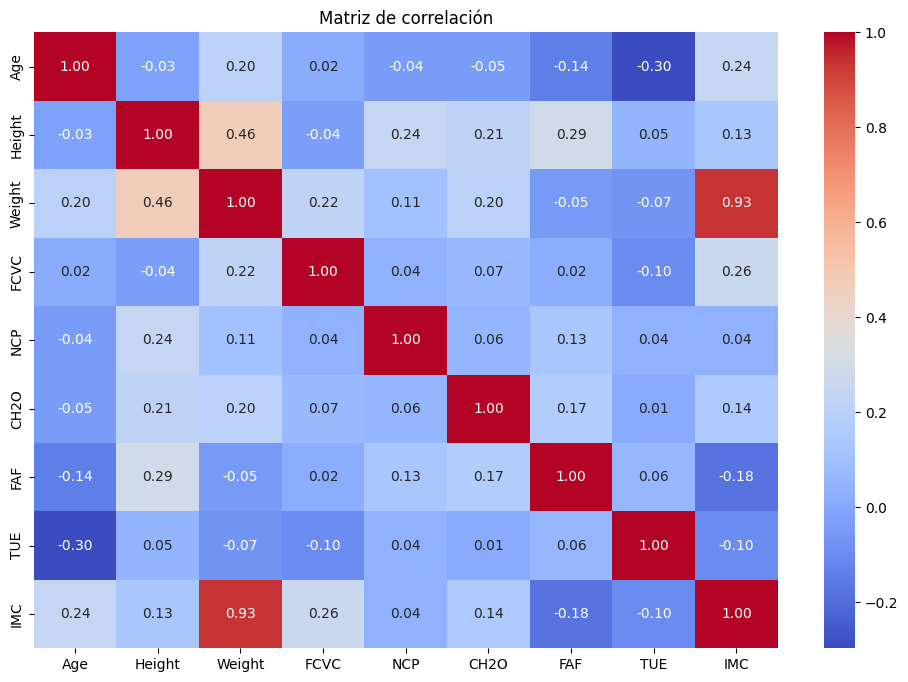

In [ ]:
# Matriz de correlación
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


**Análisis matriz de correlación**

* La variable que más se correlaciona con el BMI es el peso, con una correlación muy alta de 0.93, lo cual tiene sentido ya que el BMI se calcula en función del peso y la altura.

* La altura tiene una correlación moderada con el peso (0.46), y una correlación más débil con el BMI (0.13). Esto también es lógico: la altura influye en el cálculo del IMC, pero no tanto como el peso.

* Las variables relacionadas con hábitos saludables (FCVC, CH2O, FAF, TUE) presentan correlaciones bajas o negativas con el BMI, lo cual sugiere que una mayor frecuencia de consumo de vegetales, hidratación y actividad física podría estar asociada con un menor índice de masa corporal.

* La edad tiene una correlación baja positiva con el BMI (0.24), indicando una tendencia leve a mayor IMC con el aumento de edad.

La mayoría de las variables no están fuertemente correlacionadas entre sí, lo cual sugiere que cada una aporta información relativamente distinta al conjunto de datos.

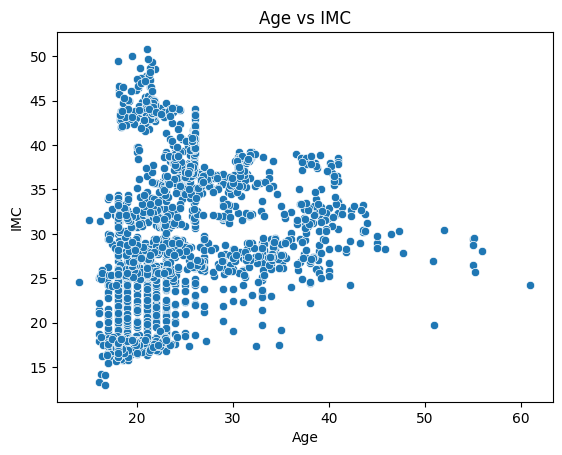

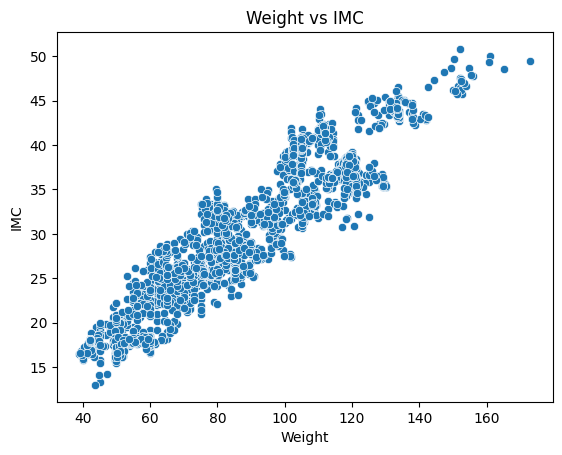

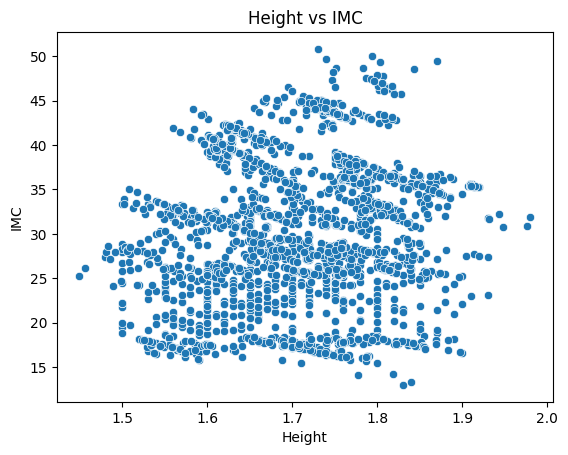

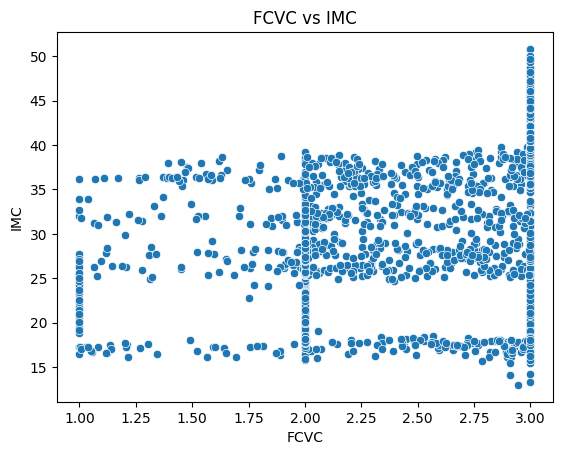

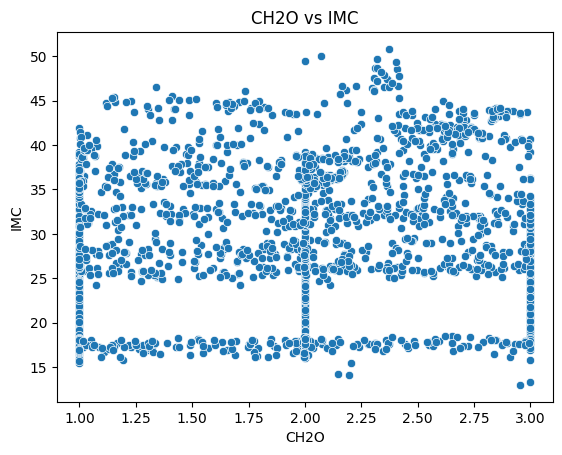

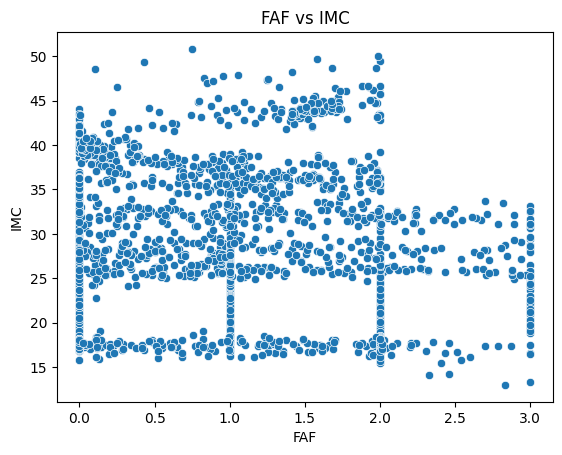

In [ ]:
# Scatterplots vs BMI
for col in ['Age', 'Weight', 'Height', 'FCVC', 'CH2O', 'FAF']:
    sns.scatterplot(data=dataset, x=col, y='IMC')
    plt.title(f'{col} vs IMC')
    plt.show()


**Análisis de graficos de dispersión entre el target y los features**

* Peso: Muestra una relación lineal fuerte y positiva con el IMC, lo cual es esperado dado que el peso es parte de la fórmula del IMC.
*  Edad, Altura, FCVC, CH2O y FAF: No muestran relaciones lineales claras con el IMC cuando se analizan individualmente.
* FCVC, CH2O y FAF aparecen como variables con valores específicos, lo que puede limitar el análisis.
* Existen agrupaciones visibles en ciertos valores de IMC (17-18, 25-30, y 35-40).
* Hay mayor variabilidad del IMC en algunos rangos de edad, particularmente en jóvenes adultos.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

#Limpieza 🧼

Para a parte de limpieza solo voy a eliminar los outliers, porque como se vio anteriormente, el dataset no cuenta con ningun valor faltante. Estos Outliers que voy a eliminar son los que se vieron en los historigramas.

In [ ]:
def quitar(dataset, columns):
    for col in columns:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        dataset = dataset[(dataset[col] >= lower) & (dataset[col] <= upper)]
    return dataset

# Columnas numéricas a revisar
column = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF']

# Aplicar la limpieza
dataset = quitar(dataset, column)


# Eliminar variables 🧹

Las variables que voy a eliminar son las siguientes:

* 'Weight' y 'Height': Como dije antes, estas variables conforman al target **IMC**, por lo que es redundante dejarlas.

* 'TUE' y 'SCC': ambas variables tienen una concentración de registros en un mismo valor, lo que aporta baja diversidad y puede generar ruido al modelo.

In [ ]:
# Eliminar las columnas especificadas
dataset = dataset.drop(columns=['Weight', 'Height', 'TUE', 'SCC', 'NObeyesdad'])

# Verificar que las columnas se hayan eliminado correctamente
dataset.columns


Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'CALC', 'MTRANS', 'IMC'],
      dtype='object')

# Conversión de variables categóricas 🔡 ➡️ 🔢

Para convertir las variables categóricas a numéricas voy a utilizar dos formas distinta.

La primera es utilizar one-hot encoding para las variables categóricas nominales, ya que contienen solo dos tipos de información. Para ello utilizo la función *get_dummies*.

Las variables categóricas ordinales solo tranformo las opciones a número manualmente.



In [ ]:
dataset = pd.get_dummies(dataset, columns=['Gender', 'FAVC', 'family_history_with_overweight', 'SMOKE', 'MTRANS'], drop_first=True)


In [ ]:
orden_caec = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
dataset["CAEC"] = dataset["CAEC"].map(orden_caec)

orden_calc = {"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3}
dataset["CALC"] = dataset["CALC"].map(orden_calc)


In [ ]:
dataset

,Age,FCVC,NCP,CAEC,CH2O,FAF,CALC,IMC,Gender_Male,FAVC_yes,family_history_with_overweight_yes,SMOKE_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,1,2.000000,0.000000,0,24.386526,False,False,True,False,False,False,True,False
1,21.000000,3.0,3.0,1,3.000000,3.000000,1,24.238227,False,False,True,True,False,False,True,False
2,23.000000,2.0,3.0,1,2.000000,2.000000,2,23.765432,True,False,True,False,False,False,True,False
3,27.000000,3.0,3.0,1,2.000000,2.000000,2,26.851852,True,False,False,False,False,False,False,True
5,29.000000,2.0,3.0,1,2.000000,0.000000,1,20.195092,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1,1.728139,1.676269,1,44.901475,False,True,True,False,False,False,True,False
2107,21.982942,3.0,3.0,1,2.005130,1.341390,1,43.741923,False,True,True,False,False,False,True,False
2108,22.524036,3.0,3.0,1,2.054193,1.414209,1,43.543817,False,True,True,False,False,False,True,False
2109,24.361936,3.0,3.0,1,2.852339,1.139107,1,44.071535,False,True,True,False,False,False,True,False




> Se visulizan que todas las variables están convertidas a tipo numéricas.


# Escalar feautures y dividir train/test 🧮

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separa variables independientes y target
X = dataset.drop("IMC", axis=1)
y = dataset["IMC"]

# Escala las features usando StandardScaler en train y aplicar la misma transformación a test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar en train
X_test_scaled = scaler.transform(X_test)  # Transformar test con el mismo scaler

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


#Obtener modeo de Regresión Lineal📈

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Coeficientes y métricas 📊

In [ ]:
# Intercepto
print("Intercepto:", model.intercept_)

# Coeficientes y nombres de columnas
feature_names = X.columns
coeficientes = pd.Series(model.coef_, index=feature_names)
print("Coeficientes:\n", coeficientes.sort_values(ascending=False))

Intercepto: 5.268234139759905
Coeficientes:
 family_history_with_overweight_yes    8.009228
FAVC_yes                              3.428085
FCVC                                  3.177357
MTRANS_Public_Transportation          3.080684
MTRANS_Bike                           2.100446
CALC                                  1.994701
MTRANS_Motorbike                      1.761559
CH2O                                  0.846693
Age                                   0.497267
MTRANS_Walking                        0.021040
FAF                                  -0.247111
SMOKE_yes                            -0.828973
NCP                                  -0.874959
Gender_Male                          -2.635797
CAEC                                 -4.401469
dtype: float64


Los coeficientes que más influyen en el IMC son el historial de sobrepeso familiar, el consumo frecuente de alimentos altos en calorías, el consumo de verduras y el uso del tranporte público.

A la inversa, las variables menos influyentes en el IMC (lo que quiere decir que afectan a un bajo nivel de índice corporal) son; fumar, la cantidad de comidas consumidad, el genero(en este caso, ser hombre indica un menor porcentaje de IMC) y el consumo de alimentos fuera de las comidas principales.

Estos coeficientes en conjunto, reflejan una posble realidad del índice de obesidad en la personas, teninedo en cuenta mayormente su hábitos alimenticios.

In [ ]:
# Entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nMétricas en TRAIN:")
print(f"R²: {r2_train:.4f} | MSE: {mse_train:.4f} | MAE: {mae_train:.4f}")

print("\nMétricas en TEST:")
print(f"R²: {r2_test:.4f} | MSE: {mse_test:.4f} | MAE: {mae_test:.4f}")



Métricas en TRAIN:
R²: 0.5062 | MSE: 36.2304 | MAE: 4.7205

Métricas en TEST:
R²: 0.5047 | MSE: 31.8979 | MAE: 4.4289


**Análisis de las métricas**

Las métricas tanto en el entrenamiento como en el testeo son muy similirales, incluso un ponco mejor en el testo, esto genera un buen rendimiento del modelo e indica que no hay un sobreajuste.
El R^2 en 0.50 indica que el modelo mide la mitad de la vairabilidad del IMC. Si bien un es un valor alto, todavía es aceptable para un modelo lineal.
El MSE tiene valores moderados.
El MAE indica que el modelo se desvía alrededor de 4/5 unidades de IMC. Esto es razonable porque puede representar un cambio de categoría (de peso normal, a sobrepeso).



## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

#Comparación de coeficientes e importancia 🔍

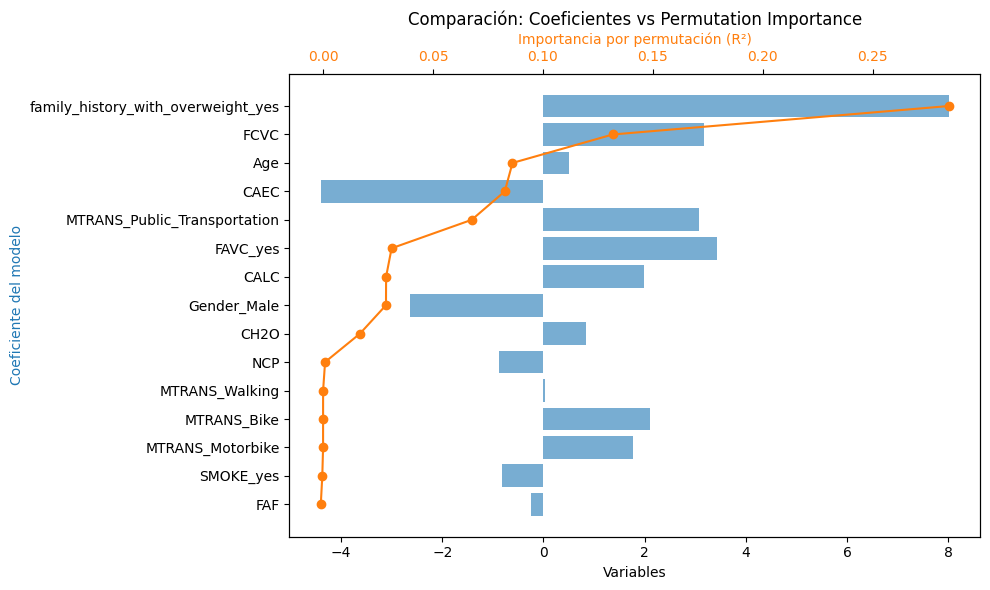

In [ ]:
from sklearn.inspection import permutation_importance
# Obtener coeficientes del modelo entrenado
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_
})

# Permutation Importance sobre el set de test
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=30, random_state=42, scoring='r2'
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'permutation_importance': result.importances_mean,
    'std': result.importances_std
})

# Unir ambos DataFrames por la columna 'feature'
combined_df = coef_df.merge(perm_df, on='feature')
# Ordenar por importancia de permutación para visualización
combined_df = combined_df.sort_values(by='permutation_importance', ascending=False)

# --- Gráfico conjunto ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para coeficientes
color = 'tab:blue'
ax1.set_xlabel('Variables')
ax1.set_ylabel('Coeficiente del modelo', color=color)
ax1.barh(combined_df['feature'], combined_df['coefficient'], color=color, alpha=0.6, label='Coeficiente')
ax1.tick_params(axis='y')
ax1.invert_yaxis()

# Segundo eje para la importancia por permutación
ax2 = ax1.twiny()
color = 'tab:orange'
ax2.set_xlabel('Importancia por permutación (R²)', color=color)
ax2.plot(combined_df['permutation_importance'], combined_df['feature'], 'o-', color=color, label='Permutación')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajuste
plt.title('Comparación: Coeficientes vs Permutation Importance')
plt.tight_layout()
plt.show()

#Análisis de comparación 🔬
* La variable de historial familiar con sobrepeso tiene el coeficiente positivo más alto y también la mayor importancia por permutación. Esto indica que tener antecedentes familiares de sobrepeso es un gran predctor para el IMC.

* La frecuencia del consumo de vegetales y la edad también presentan alto impacto en ambas métricas, lo que valida su relevancia.

* Algunas variables como el consumo de alimentos entre comidas tienen un coeficiente alto negativo pero relativamente baja importancia por permutación. Esto sugiere que, aunque el modelo les asigna peso, podrían estar correlacionadas con otras variables o tener un efecto menos independiente.

* Por el contrario, variables como CH2O, FAF o NCP presentan tanto coeficientes bajos como baja importancia por permutación, lo cual sugiere que podrían eliminarse del modelo sin deteriorar el rendimiento.

**En conclusión** el modelo lineal entrenado logra explicar la mitad de la variación del IMC usando variables relacionadas al estilo de vida, transporte, alimentación y antecedentes familiares. Si bien el modelo puede mejorar, esta regresión lineal es una base sólida, interpretable y funcional, ideal para un análisis explicativo y para identificar los factores que más influyen en el peso corporal.



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

# Variables más importantes✅

Tanto el análisis de coeficientes del modelo lineal como el método de Permutation Importance coinciden en que las variables más influyentes para predecir el IMC son:

* **'family_history_with_overweight_yes:'** tener antecedentes familiares de sobrepeso.

* **'FCVC:'** frecuencia de consumo de vegetales.

* **'Age:'** la edad también tiene un impacto moderado.

* **'CAEC:'** frecuencia de comer entre comidas.

* **'MTRANS_Public_Transportation:'** medio de transporte, reflejando el nivel de actividad física.

Estas variables no solo muestran un coeficiente alto en el modelo, sino que al ser desordenadas aumentan el error, lo que confirma su relevancia.

**Las variables más importantes coinciden con mi análisis exploratorio.**

En los gráficos y correlaciones previas, se observaba que la edad, la historia familiar y los hábitos alimenticios estaban relacionados con el IMC. También se había notado que el medio de transporte podía estar vinculado con la actividad física y, por lo tanto, con el peso corporal. Esto demuestra coherencia entre el análisis exploratorio de datos y los resultados obtenidos por el modelo.


# Rendimiento del modelo 🔋

El modelo tiene R² de 0.50 en el set de test, esto indica que el modelo explica el 50% de la variabilidad del IMC. Es un valor moderado, no perfecto, pero razonable para un modelo lineal con variables de estilo de vida.

**¿A qué podría deberse?**

* El modelo lineal es muy básico, no puede entender relaciones complicadas entre las variables.
* Los datos no son perfectos, muchas variables son categóricas.
* El IMC depende de muchas cosas, hay factores importantes que no están en los datos, como la genética, las hormonas o el metabolismo de cada persona.

**En conclusión**, el modelo tiene un rendimiento aceptable para un enfoque simple como la regresión lineal, y los resultados son coherentes con lo explorado. Se identificaron variables importantes que tienen sentido, aunque para mejorar el rendimiento se necesitan modelos más complejos (como un random forest) o datasets mas completos con más variables.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

#Eliminar y reentrenar ⚙️

Para este nuevo modelo voy a elegir las 7 variables con menos importancia:

* CH2O
* NCP
* MTRANS_Walking
* MTRANS_Bike
* MTRANS_Motorbike
* SMOKE_yes
* FAF

In [ ]:
# Eliminar las columnas
dataset = dataset.drop(columns=['CH2O', 'NCP', 'MTRANS_Walking', 'MTRANS_Bike', 'MTRANS_Motorbike', 'SMOKE_yes', 'FAF'])
dataset2 = dataset
# Verificar que las columnas se hayan eliminado correctamente
dataset2.columns


Index(['Age', 'FCVC', 'CAEC', 'CALC', 'IMC', 'Gender_Male', 'FAVC_yes',
       'family_history_with_overweight_yes', 'MTRANS_Public_Transportation'],
      dtype='object')

In [ ]:
# Separa variables independientes y target
X = dataset2.drop("IMC", axis=1)
y = dataset2["IMC"]

# Escala las features usando StandardScaler en train y aplicar la misma transformación a test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar en train
X_test_scaled = scaler.transform(X_test)  # Transformar test con el mismo scaler

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
# Entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Test
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nMétricas en TRAIN:")
print(f"R²: {r2_train:.4f} | MSE: {mse_train:.4f} | MAE: {mae_train:.4f}")

print("\nMétricas en TEST:")
print(f"R²: {r2_test:.4f} | MSE: {mse_test:.4f} | MAE: {mae_test:.4f}")


Métricas en TRAIN:
R²: 0.5017 | MSE: 36.5618 | MAE: 4.7792

Métricas en TEST:
R²: 0.4954 | MSE: 32.4920 | MAE: 4.4986


**Análisis de métricas**

El nuevo modelo con las variables eliminadas, muestra muy poca diferencia con el modelo original, tanto en el original como en el nuevo, los valores de R^2, MSE y MAE, son similirales tanto en el entrenamiento como en el testeo. Aunque este nuevo modelo tiene una leve empeora, sigue indicando un buen rendimiento sin sobreajuste.
Esto comprueba que las variables con menor importnacia no aportan relevancia al modelo.


#CONCLUSIÓN FINAL

Este trabajo me permitió aplicar un modelo de regresión lineal en un contexto real, lo que me ayudó a comprender mejor su funcionamiento. Reforcé conocimientos como la limpieza de datos, la manipulación de valores nulos y outliers, y la importancia de analizar las variables antes de entrenar un modelo. La visualización de variables fue fundamental para detectar patrones, relaciones y posibles errores, y aprendí que interpretar correctamente un gráfico puede cambiar la lectura de los resultados.

Uno de los mayores aprendizajes fue el uso del Permutation Importance, una herramienta que aporta información valiosa sobre el peso real de cada variable en el modelo, superando en algunos casos a la simple interpretación de coeficientes. Sin embargo, esta parte también fue una de las más desafiantes, ya que nunca había trabajado con estas métricas, y me llevó tiempo entender su lógica y cómo interpretarlas correctamente. Lo mismo me paso con la interpretación rápida de gráficos, que me llevo más tiempo de lo que esperaba.


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
